Name: Ron Keinan

ID: 203735857

All the cells I added start with "RK"

I run the same loop to create different models - once with a wider degree set, once with less sampels of data. conclusions are written after each try.

In [8]:
%matplotlib inline


# Underfitting vs. Overfitting

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.


In this example the training set are the blue noisy samples used to train a model (the blue polynomial function)

### Approximating a polynomial

$f(x) = c_0 + c_1x + c_2x^2 + \dotsb + c_{12}x^{12}$ for arbitrary constants $\{c_n\}$.

The testing set is approximated by the true function in orange (but could be a new set of noisy points)

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Automatically created module for IPython interactive environment


In [10]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [11]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

1 [-1.60931179]
4 [  0.46754142 -17.78954475  23.5926603   -7.26289872]
15 [-2.98291188e+03  1.03898766e+05 -1.87415056e+06  2.03715125e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]


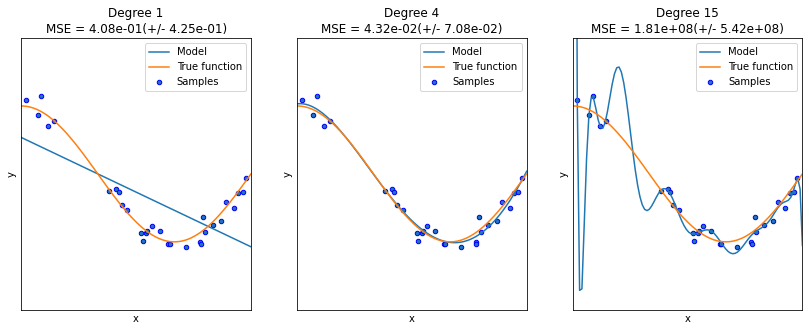

In [12]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print(degrees[i],linear_regression.coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

Automatically created module for IPython interactive environment


In [14]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


In [15]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

1 [-0.33538539]
4 [-0.33538539 -0.         -0.         -0.        ]
15 [-0.33538539 -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


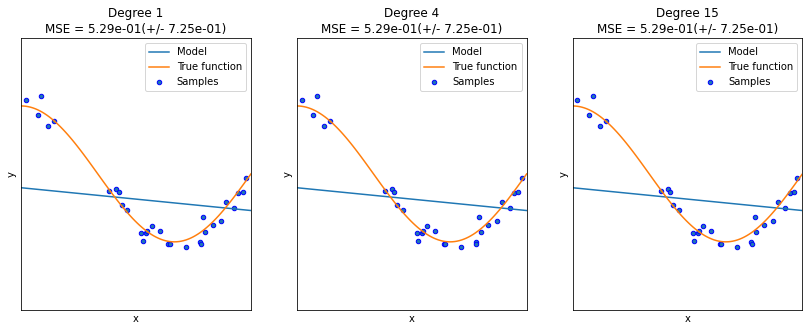

In [16]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    #linear_regression = LinearRegression()
    linear_regression = Ridge()
    linear_regression = Lasso(alpha=0.1)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression_reg", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print(degrees[i],linear_regression.coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### RK - let's checke more degree levels:

In [17]:
# RK - 

np.random.seed(0)

n_samples = 30
degrees = [1, 3, 5, 7, 9, 11, 13, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

1 [-1.60931179]
3 [-2.19617614 -7.05669992  8.202858  ]
5 [ -2.17893409   0.83127959 -26.17982339  48.6673596  -22.31700272]
7 [ 5.18856582e-01 -4.01913837e+01  2.16520372e+02 -6.47289094e+02
  1.01366952e+03 -7.70202571e+02  2.25968458e+02]
9 [ 1.94565584e+01 -4.39348916e+02  3.90934764e+03 -1.83291767e+04
  4.92807508e+04 -7.89941137e+04  7.47694822e+04 -3.85987168e+04
  8.38179381e+03]
11 [-9.36513257e+01  2.34516406e+03 -2.78819006e+04  1.81923796e+05
 -7.19613139e+05  1.82061783e+06 -3.01412785e+06  3.25221900e+06
 -2.20401535e+06  8.51856765e+05 -1.43232669e+05]
13 [ 1.82129912e+02 -6.20605589e+03  1.04045526e+05 -9.98444741e+05
  5.93306838e+06 -2.30761731e+07  6.08725626e+07 -1.10896252e+08
  1.39728772e+08 -1.19631046e+08  6.64602586e+07 -2.16163145e+07
  3.12554837e+06]
15 [-2.98291188e+03  1.03898766e+05 -1.87415056e+06  2.03715125e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.9137576

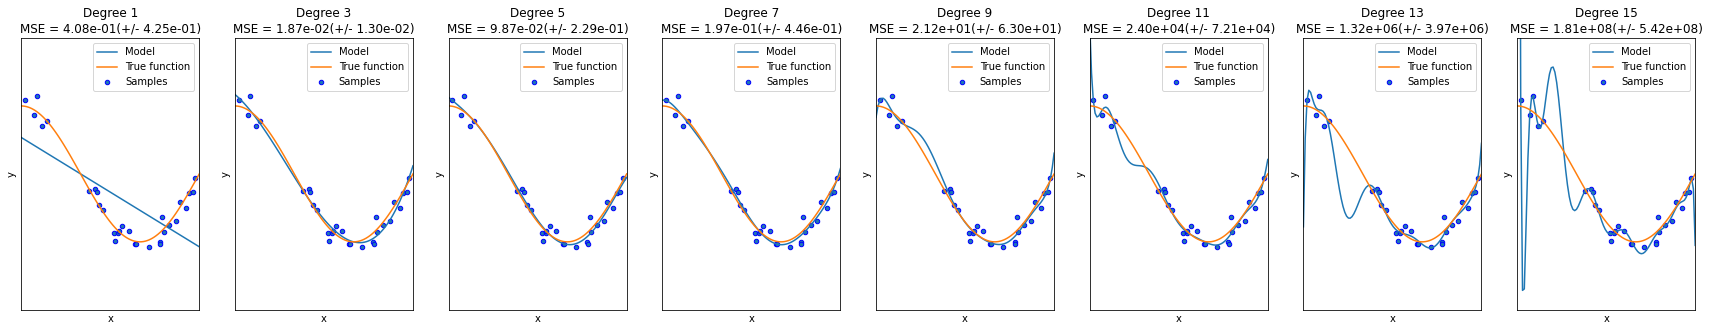

In [19]:
# RK - 

plt.figure(figsize=(30, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print(degrees[i],linear_regression.coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

RK - Indeed, around degree of 5 the model is accurate. as less than 5 it is more underfitted, and above 5 is more overfitted.


### RK - let's check less data sampels:

In [22]:
# RK - 

np.random.seed(0)

n_samples = 10
degrees = [1, 3, 5, 7, 9, 11, 13, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

1 [-0.12342186]
3 [-14.67561933  12.92520667  -1.98211896]
5 [ 101.42903706 -316.5454092   445.4243434  -290.40234795   71.92098634]
7 [  -6885.57975493   37327.99681852 -109818.16580904  189276.13620914
 -191195.75257831  104882.50514731  -24121.99448183]
9 [-4.15719319e+06  2.91415431e+07 -1.17792963e+08  3.02515465e+08
 -5.11833721e+08  5.70434996e+08 -4.03768505e+08  1.64688338e+08
 -2.94889995e+07]
11 [ -1596559.28490202   9550584.46715387 -30589002.70075481
  53697864.85683867 -40794017.89735855 -16895380.17599533
  48297727.21908628  -2095180.22057225 -52323540.85810787
  44615473.56497954 -11980959.65794531]
13 [  -743291.14360921   3959028.4421436  -10633189.96196635
  13478431.30881185  -2133606.92179365 -11238087.92699662
   2450427.19948642  11191033.17789054    876545.38527594
 -11401174.94228802  -4368889.13452257  14216971.35188046
  -5712141.22744799]
15 [-4.00345787e+05  1.95479814e+06 -4.57929511e+06  4.32260089e+06
  1.38580028e+06 -3.92214406e+06 -2.10596561e+06  2.

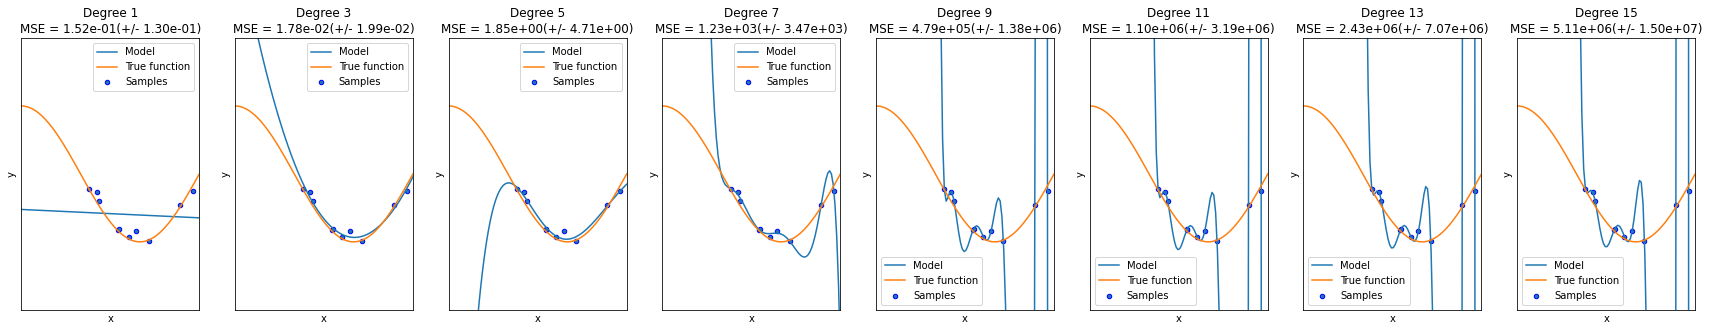

In [23]:
# RK - 

plt.figure(figsize=(30, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print(degrees[i],linear_regression.coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

RK - with less data sampels all models are less accuract - more underfitted. we need a minimum amount of data sampels to train the model well.